## Observations and Insights 

In [1]:
# 1. Ramicane and Capomulin appear to be the best treatments. Their final tumor volumes 
# and summary statistics of all tumor volumes are the lowest of all treatments.

# 2. Other treatments don't seem to reduce tumor volume better than a placebo. 

# 3. Tumor volume is highly positively correlated with mouse weight for the Capomulin
# regimen. The correlation coefficient is .84.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pandas import DataFrame

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset - 249 mice in metadata - 1893 rows in results. 
combined = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined[combined.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated = combined[combined["Mouse ID"] == "g989"]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combined[combined["Mouse ID"] != "g989"]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them 
# all together at the end.
ramicane = clean.loc[clean["Drug Regimen"] == "Ramicane"]
mean_ramicane = np.mean(ramicane["Tumor Volume (mm3)"])
median_ramicane = np.median(ramicane["Tumor Volume (mm3)"])
variance_ramicane = np.var(ramicane["Tumor Volume (mm3)"])
sd_ramicane = np.std(ramicane["Tumor Volume (mm3)"])
sem_ramicane = ramicane["Tumor Volume (mm3)"].sem()
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"]
mean_capomulin = np.mean(capomulin["Tumor Volume (mm3)"])
median_capomulin = np.median(capomulin["Tumor Volume (mm3)"])
variance_capomulin = np.var(capomulin["Tumor Volume (mm3)"])
sd_capomulin = np.std(capomulin["Tumor Volume (mm3)"])
sem_capomulin = capomulin["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Drug": ["Ramicane", "Capomulin"],
                        "Mean": [mean_ramicane, mean_capomulin], 
                        "Median": [median_ramicane, median_capomulin],
                        "Variance": [variance_ramicane, variance_capomulin],
                        "Standard Deviation": [sd_ramicane, sd_capomulin],
                        "SEM": [sem_ramicane, sem_capomulin]})
summary

# et cetera

,Drug,Mean,Median,Variance,Standard Deviation,SEM
0,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grouped_drug = clean.groupby(["Drug Regimen"])
grouped_drug["Tumor Volume (mm3)"].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

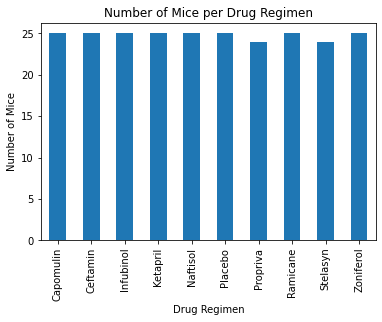

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout  
# the course of the study using pandas. 
treatment_group = clean.groupby(["Drug Regimen"])
treatment_number = treatment_group["Mouse ID"].nunique()
treatment_chart = treatment_number.plot(kind="bar", title="Number of Mice per Drug Regimen")
treatment_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

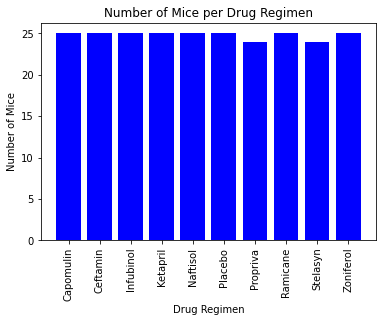

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.
number = [25, 25, 25, 25, 25, 25, 24, 25, 24, 25]
x_axis = np.arange(len(number))
plt.bar(x_axis, number, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", 
                            "Naftisol", "Placebo", "Propriva", "Ramicane",
                            "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()

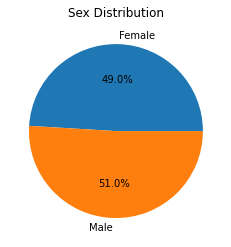

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean.groupby(["Sex"])
sex_number = sex_group["Sex"].count()
sex_number.plot(kind="pie", title="Sex Distribution", autopct="%1.1f%%")
plt.ylabel("")

plt.show()
plt.tight_layout()

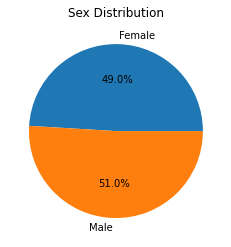

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
values = [922, 958]
plt.pie(values, labels=sex, autopct="%1.1f%%")
plt.title("Sex Distribution")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean.groupby("Mouse ID")
mouse_max = mouse_group["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged = pd.merge(clean, mouse_max, how="inner", on="Mouse ID")
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty dictionaries to fill with tumor vol data for each regimen(for plotting)
tumor_volume = {} 
drug_regimen = {}
    
# Locate the rows which contain mice on each drug and get the tumor volumes and drug regimen   
for treatment in treatments:
    for row in range(len(merged)):
        if merged.loc[row, "Drug Regimen"] == treatment:
            if merged.loc[row, "Timepoint_x"] == merged.loc[row, "Timepoint_y"]:
                tumor_volume[merged.loc[row, "Mouse ID"]] = merged.loc[row, "Tumor Volume (mm3)"]
                drug_regimen[merged.loc[row, "Mouse ID"]] = merged.loc[row, "Drug Regimen"]

# create two dataframes of tumor volume and drug regimen and merge               
tumor_volume_df = DataFrame(list(tumor_volume.items()),columns = ["Mouse ID","Tumor Volume (mm3)"])
drug_regimen_df = DataFrame(list(drug_regimen.items()),columns = ["Mouse ID","Drug Regimen"])
merged_df = pd.merge(drug_regimen_df, tumor_volume_df, how="inner", on="Mouse ID")

# create separate dataframes for the four drugs
ceftamin_df = merged_df[merged_df["Drug Regimen"] == "Ceftamin"]
ramicane_df = merged_df[merged_df["Drug Regimen"] == "Ramicane"]
infubinol_df = merged_df[merged_df["Drug Regimen"] == "Infubinol"]
capomulin_df = merged_df[merged_df["Drug Regimen"] == "Capomulin"]

# get series
ceftamin_tumor_volume = ceftamin_df["Tumor Volume (mm3)"]
ramicane_tumor_volume = ramicane_df["Tumor Volume (mm3)"]
infubinol_tumor_volume = infubinol_df["Tumor Volume (mm3)"]
capomulin_tumor_volume = capomulin_df["Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
quartiles = ceftamin_tumor_volume.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamine values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.")
quartiles = ramicane_tumor_volume.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.")
quartiles = infubinol_tumor_volume.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.")
quartiles = capomulin_tumor_volume.quantile([.25, .5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {round(lower_bound, 2)} and above {round(upper_bound, 2)} could be outliers.")
print("Mouse c326 treated with Infubinol may be an outlier.")

Ceftamine values below 25.36 and above 87.67 could be outliers.
Ramicane values below 17.91 and above 54.31 could be outliers.
Infubinol values below 36.83 and above 82.74 could be outliers.
Capomulin values below 20.7 and above 51.83 could be outliers.
Mouse c326 treated with Infubinol may be an outlier.


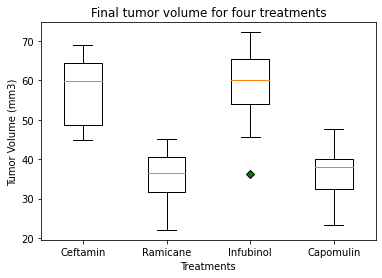

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
graph = [ceftamin_tumor_volume, ramicane_tumor_volume, infubinol_tumor_volume, capomulin_tumor_volume]
green_diamond = dict(markerfacecolor='g', marker='D')
regimens = ["Ceftamin", "Ramicane", "Infubinol", "Capomulin"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume for four treatments")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(graph, flierprops=green_diamond, labels=regimens)
ax1.set_xlabel("Treatments")
plt.show()

## Line and Scatter Plots

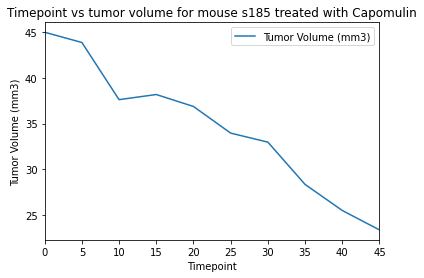

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean.loc[clean["Drug Regimen"] == "Capomulin"]
mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]
mouse.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Timepoint vs tumor volume for \
mouse s185 treated with Capomulin")

plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.show()
plt.tight_layout()

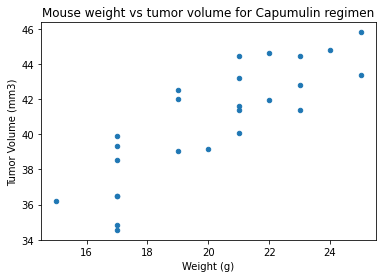

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
grouped_capomulin = capomulin.groupby("Mouse ID")
volume = grouped_capomulin["Tumor Volume (mm3)"].mean()
weight = grouped_capomulin["Weight (g)"].mean()
table = pd.merge(volume, weight, how="inner", on="Mouse ID")
table.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse weight vs \
tumor volume for Capumulin regimen")

plt.show()
plt.tight_layout()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(volume, weight)
print(f"The correlation coefficient between tumor volume and weight is {round(correlation[0],2)}.")

The correlation coefficient between tumor volume and weight is 0.84.


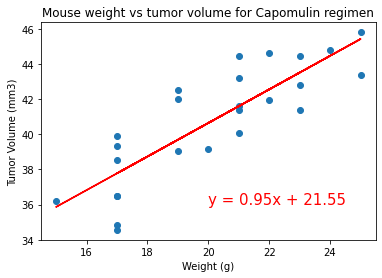

In [20]:
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("Mouse weight vs tumor volume for Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [21]:
# Thanks for grading my assignment!